# Suicide Rates, case study.
## Problem Statement
### Context
Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

### Objective
The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

### Data Dictionary
We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following attributes:

- **country**: Country
- **year**: Year
- **sex**: Sex (male or female)
- **age**: Suicide age range, ages divided into six categories
- **suicides_no**: number of suicides
- **population**: population of that sex, in that age range, in that country, and in that year
- **suicides/100k pop**: Number of suicides per 100k population
- **gdp_for_year($)**: GDP of the country in that year in dollars
- **gdp_per_capita($)**: Ratio of the country’s GDP and its population
- **generation**: Generation of the suicides in question, being possible 6 different categories

### Questions to explore
1. Is the suicide rate more prominent in some age categories than others?
2. Which countries have the most and the least number of suicides?
3. What is the effect of the population on suicide rates?
4. What is the effect of the GDP of a country on suicide rates?
5. What is the trend of suicide rates across all the years?
6. Is there a difference between the suicide rates of men and women?
***

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.__version__

'1.4.0'

In [3]:
df = pd.read_csv('./data/master.csv')

In [29]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
df.shape

(27820, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


The table above tells us that there are no missing values in our dataset.

In [9]:
df[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe() #descriptive stats of continuous columns

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


This 

### 1. Is the suicide rate more prominent in some age categories than others?

In [10]:
# agesToSuicideRate=df.groupby('age')['suicides/100k pop'].sum().to_frame().sort_values(by='suicides/100k pop').reset_index()
agesToSuicideRate=df.sort_values(by='age').reset_index()

ages = np.array(list(set(agesToSuicideRate['age'])))
agesList=sorted(ages)
agesList

['15-24 years',
 '25-34 years',
 '35-54 years',
 '5-14 years',
 '55-74 years',
 '75+ years']

<AxesSubplot:title={'center':'Suicide rate prominency by age group'}, xlabel='age', ylabel='suicides/100k pop'>

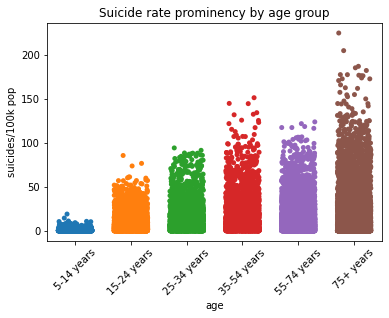

In [11]:
##agesToSuicideRate=df.groupby('age')['suicides/100k pop'].sum().to_frame().sort_values(['suicides/100k pop']).reset_index()
plt.xticks(rotation=45)
plt.title('Suicide rate prominency by age group')
sns.stripplot(x = 'age', y = 'suicides/100k pop', data=agesToSuicideRate, order=['5-14 years',
                                                                                  '15-24 years',
                                                                                  '25-34 years',
                                                                                  '35-54 years',
                                                                                  '55-74 years',
                                                                                  '75+ years'], jitter=0.3)
# sns.swarmplot(x = 'age', y = 'suicides/100k pop', data=df)

### 2. Which countries have the most and the least number of suicides?

#### 2.1 Countries with the most number of suicides

               country  suicides_no
75  Russian Federation      1209742
98       United States      1034013
46               Japan       806902
33              France       329127
95             Ukraine       319950
35             Germany       291262
73   Republic of Korea       261730
15              Brazil       226613
69              Poland       139098
97      United Kingdom       136805


<AxesSubplot:xlabel='country'>

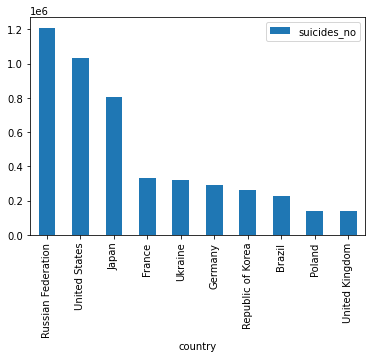

In [12]:
# agesToSuicideRate=df.groupby('age')['suicides/100k pop'].sum().to_frame().sort_values(by='suicides/100k pop').reset_index()
# mostSuicides=df.groupby('country')['suicides_no'].sum().to_frame().sort_values('suicides_no').head(10)
# mostSuicides.plot(x='country',y='suicides_no',kind='bar',figsize=(15,5))
mostSuicides=df.groupby('country')['suicides_no'].sum().reset_index().sort_values('suicides_no').tail(10).sort_values('suicides_no', ascending=False)
print(mostSuicides)
mostSuicides.plot(x='country',y='suicides_no',kind='bar')

#### 2.1 Countries with the most number of suicides

                  country  suicides_no
27               Dominica            0
76  Saint Kitts and Nevis            0
79             San Marino            4
1     Antigua and Barbuda           11
55               Maldives           20
54                  Macau           27
65                   Oman           33
37                Grenada           38
17             Cabo Verde           42
48               Kiribati           53


<AxesSubplot:xlabel='country'>

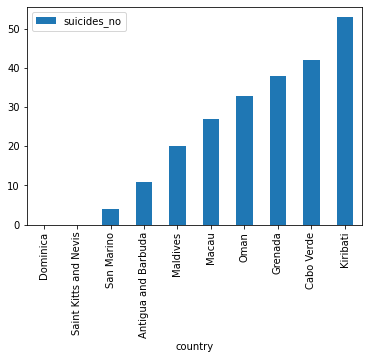

In [13]:
# agesToSuicideRate=df.groupby('age')['suicides/100k pop'].sum().to_frame().sort_values(by='suicides/100k pop').reset_index()
# leastSuicides=df.groupby('country')['suicides_no'].sum().to_frame().sort_values('suicides_no').tail(10).sort_values('suicides_no', ascending=False).to_frame()
# leastSuicides
leastSuicides=df.groupby('country')['suicides_no'].sum().reset_index().sort_values('suicides_no').head(10)
print(leastSuicides)
leastSuicides.plot(x='country',y='suicides_no',kind='bar')

### 3. What is the effect of the population on suicide rates?

<class 'pandas.core.frame.DataFrame'>
                  country  year     sex          age  suicides_no  \
population                                                          
278              Kiribati  1991    male    75+ years            0   
286              Kiribati  1992    male    75+ years            0   
287              Kiribati  1995    male    75+ years            0   
290              Kiribati  1993    male    75+ years            0   
291              Kiribati  1994    male    75+ years            0   
...                   ...   ...     ...          ...          ...   
43139910    United States  2006    male  35-54 years        10641   
43240905    United States  2004  female  35-54 years         3399   
43509335    United States  2005  female  35-54 years         3209   
43607902    United States  2007  female  35-54 years         3525   
43805214    United States  2006  female  35-54 years         3376   

            suicides/100k pop       country-year  HDI for year  

<AxesSubplot:xlabel='population', ylabel='suicides/100k pop'>

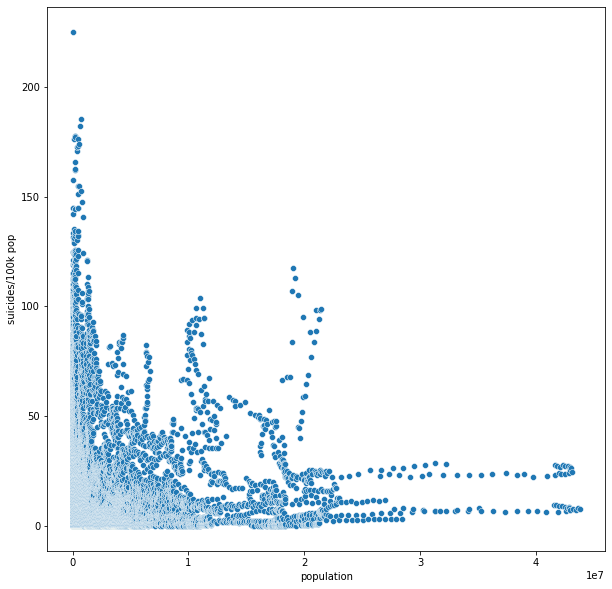

In [39]:
# suicideRatesToPopulation = df.groupby(by=['population'])['suicides/100k pop'].sum().reset_index().sort_values('suicides/100k pop')
# .sum().reset_index()

# data
# suicideRatesToPopulation=df.sort_values('population')
# X = suicideRatesToPopulation['population']
# Y = suicideRatesToPopulation['suicides/100k pop']
# print(X)

# # plot the scatter plot
# plt.scatter(X,Y, alpha = 0.1)

# # add the axes labels to the plot
# plt.xlabel('population')
# plt.ylabel('suicides/100k pop')

suicideRatesToPopulation = df.groupby('population').first()
print(type(suicideRatesToPopulation))
print(suicideRatesToPopulation)

figure = plt.figure(figsize=(10,10))
sns.scatterplot(x='population',y='suicides/100k pop', data=suicideRatesToPopulation)

### 4. What is the effect of the GDP of a country on suicide rates?

<class 'pandas.core.frame.DataFrame'>
                       country  year     sex          age  suicides_no  \
gdp_per_capita ($)                                                       
251                    Albania  1992    male  35-54 years           12   
291                 Kyrgyzstan  1999    male  55-74 years           71   
313                 Kyrgyzstan  2000    male  55-74 years           76   
345                 Kyrgyzstan  2001    male    75+ years           12   
357                    Armenia  1993  female    75+ years            6   
...                        ...   ...     ...          ...          ...   
113120              Luxembourg  2012    male    75+ years            7   
120423              Luxembourg  2013    male    75+ years            3   
121315              Luxembourg  2008    male    75+ years            5   
122729              Luxembourg  2011    male    75+ years            4   
126352              Luxembourg  2014    male  55-74 years           18   


<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

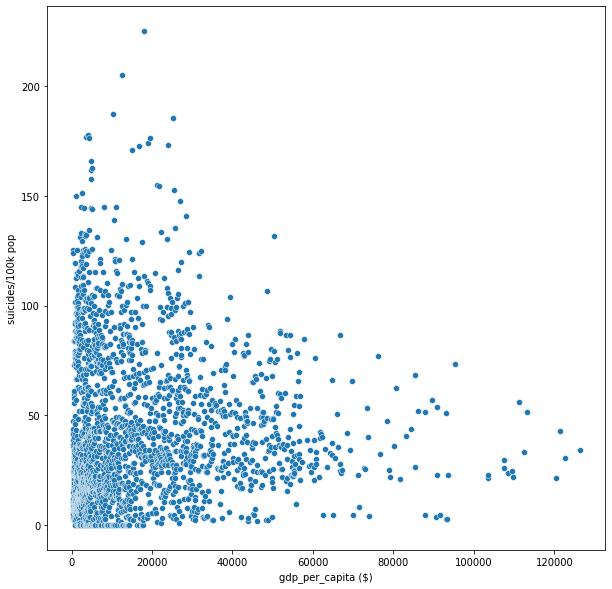

In [38]:
# leastSuicides=df.groupby('country')['suicides_no'].sum().reset_index().sort_values('suicides_no').head(10)

suicideRatesToGDP = df.groupby('gdp_per_capita ($)').first()
print(type(suicideRatesToGDP))
print(suicideRatesToGDP)

figure = plt.figure(figsize=(10,10))
sns.scatterplot(x='gdp_per_capita ($)',y='suicides/100k pop', data=suicideRatesToGDP)

### 5. What is the trend of suicide rates across all the years?

<AxesSubplot:xlabel='year'>

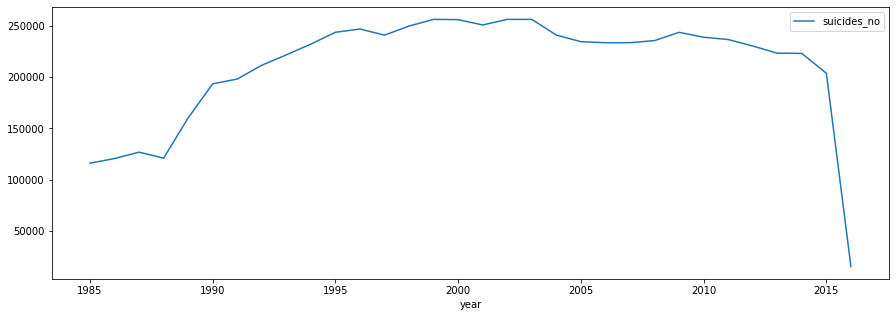

In [65]:
suicideRateTrend = df[['year','suicides_no']].groupby(['year']).sum()
suicideRateTrend.plot(figsize=(15,5))

### 6. Is there a difference between the suicide rates of men and women?

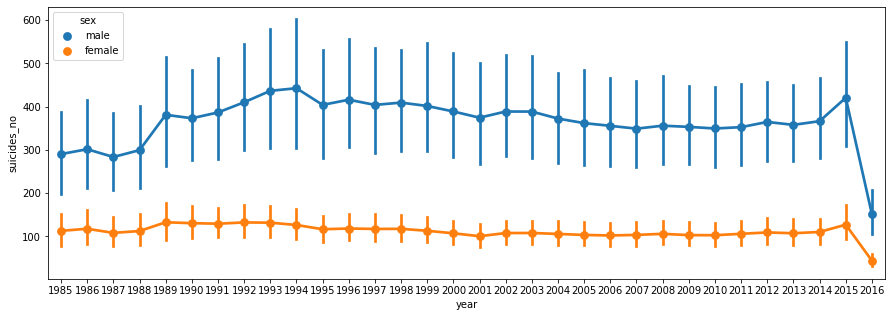

In [61]:
# suicideRateTrend = df[['sex','suicides/100k pop']].groupby(['sex']).sum()
# suicideRateTrend = df.groupby('year')['sex'].first()
# suicideRateTrend.plot(figsize=(15,5))
# suicideRateTrend

plt.figure(figsize=(15,5))

sns.pointplot(x="year", y="suicides_no", hue = 'sex',  data=df)
plt.show()